### Train MLP on Circuit Elements

##### Load Training Data

In [6]:
%matplotlib notebook

In [7]:
import pickle

# LOAD DATA FROM FILES
with open("../Training_Data/filter_dataset_1.pkl", "rb") as f:
    loaded_training_data = pickle.load(f)

with open("../Training_Data/filter_dataset_2.pkl", "rb") as f:
    loaded_validation_data = pickle.load(f)

with open("../Training_Data/filter_dataset_3.pkl", "rb") as f:
    loaded_testing_data = pickle.load(f)

##### Create Data Loaders

In [8]:
import sys
import importlib
sys.path.append('../ML_utils/')
import ML_funcs as ML # type: ignore
importlib.reload(ML)


# Training Dataloader
S21 = loaded_training_data["S21_dB_clean"]
filt = loaded_training_data["filters_clean"]
tr_dl = ML.create_dataloader(s21_data=S21, filter_param=filt, batch_size=128, shuffle=True)

# Evaluation Dataloader
S21 = loaded_validation_data["S21_dB_clean"]
filt = loaded_validation_data["filters_clean"]
va_dl = ML.create_dataloader(s21_data=S21, filter_param=filt, batch_size=128, shuffle=True)

# Testing Dataloader
S21 = loaded_testing_data["S21_dB_clean"]
filt = loaded_testing_data["filters_clean"]
te_dl = ML.create_dataloader(s21_data=S21, filter_param=filt, batch_size=128, shuffle=True)

del S21, filt

##### Implement Model

In [9]:
import torch
import torch.nn as nn


import sys
import importlib
sys.path.append('../ML_utils/')
import ML_funcs as ML # type: ignore
importlib.reload(ML)




# device = "cpu"
device = "cuda"
criterion = ML.MSPELoss()


# Define Model
MLP_1 = ML.MLP_v1(  in_dim = 1000,
                    hidden_dims = (512, 256, 128),
                    out_dim = 10,
                    act = nn.ReLU(),
                    drop_prob = 0.2     )



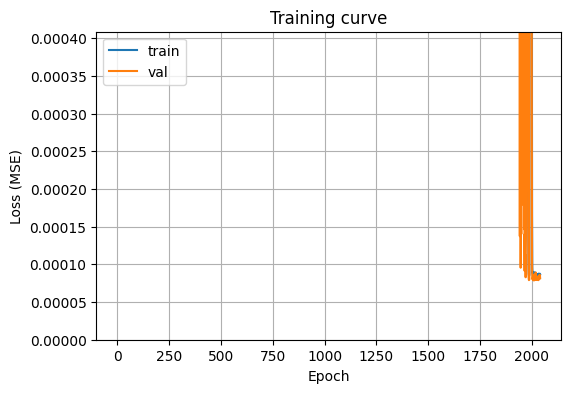

Epoch 2051 | train 0.000088 | val 0.000085
Epoch 2052 | train 0.000093 | val 0.000088
Epoch 2053 | train 0.000089 | val 0.000079
Epoch 2054 | train 0.000086 | val 0.000084


KeyboardInterrupt: 

In [10]:

# Train Model
MLP_1 = ML.train_model( tr_dl, va_dl,
                        criterion = criterion,
                        batch_size = 128,
                        lr = 1e-3,
                        weight_decay = 1e-4,
                        num_epochs = 5000,
                        drop_prob = 0.05,
                        device = device,
                        plotting=True)

